In [1]:
import cv2

In [2]:
# Two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

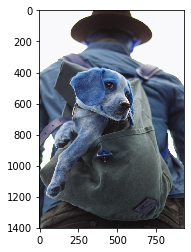

In [4]:
plt.imshow(img1)

In [5]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

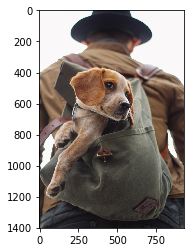

In [6]:
plt.imshow(img1)

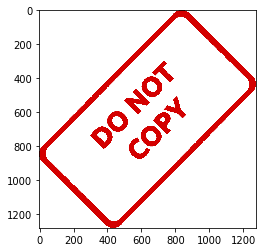

In [7]:
plt.imshow(img2)

### Resizing the Images

In [8]:
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

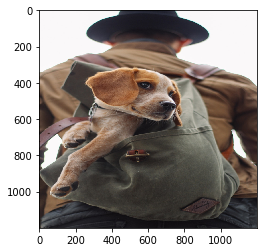

In [9]:
plt.imshow(img1)

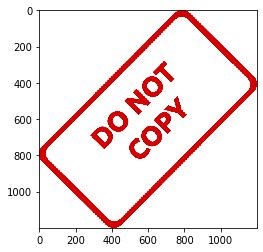

In [10]:
plt.imshow(img2)

### Blending the Image

In [11]:
img1.shape

(1200, 1200, 3)

In [12]:
img2.shape

(1200, 1200, 3)

In [13]:
blended = cv2.addWeighted(src1=img1,alpha=.8,src2=img2,beta=.10,gamma=10)

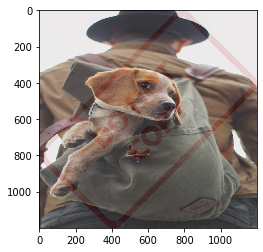

In [14]:
plt.imshow(blended)

## Overlaying Images of Different Sizes

In [15]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [16]:
x_offset=0
y_offset=0

In [17]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

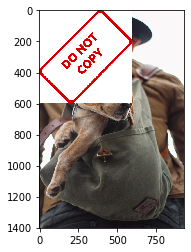

In [18]:
plt.imshow(large_img)

## Blending Images of Different Sizes (LOGO)

### Imports

In [19]:
import numpy as np
import cv2

In [20]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

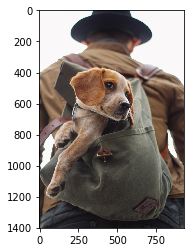

In [21]:
plt.imshow(img1)

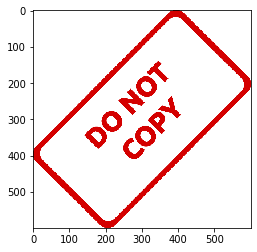

In [22]:
plt.imshow(img2)

### Region of Interest (ROI)

In [23]:
x_offset=934-600
y_offset=1401-600

In [24]:
rows,cols,channels = img2.shape
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER

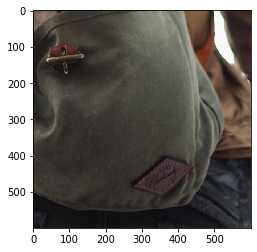

In [25]:
plt.imshow(roi)

In [26]:
roi.shape

(600, 600, 3)

### Creating a Mask

In [27]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [28]:
img2gray.shape

(600, 600)

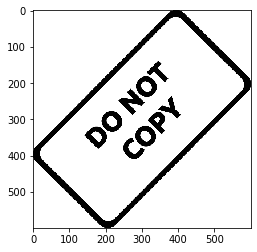

In [29]:
plt.imshow(img2gray,cmap='gray')

In [30]:
mask_inv = cv2.bitwise_not(img2gray)

In [31]:
mask_inv.shape

(600, 600)

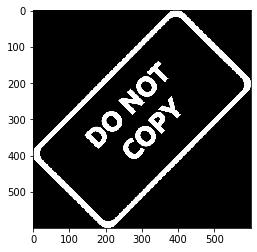

In [32]:
plt.imshow(mask_inv,cmap='gray')

## Convert Mask to have 3 channels

In [33]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [34]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [35]:
bk.shape

(600, 600, 3)

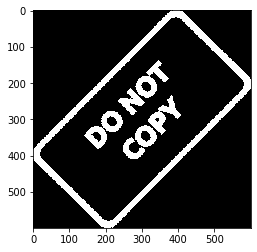

In [36]:
plt.imshow(bk)

### Grab Original FG image and place on top of Mask

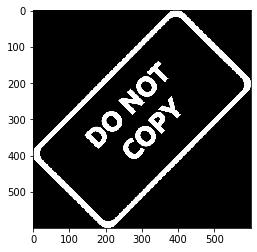

In [37]:
plt.imshow(mask_inv,cmap='gray')

In [38]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

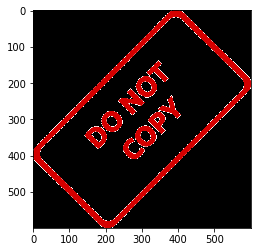

In [39]:
plt.imshow(fg)

In [40]:
fg.shape

(600, 600, 3)

### Get ROI and blend in the mask with the ROI

In [41]:
final_roi = cv2.bitwise_or(roi,fg)

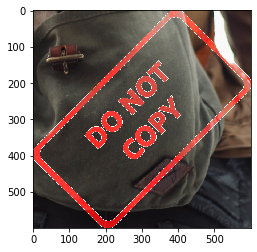

In [42]:
plt.imshow(final_roi)

### Now add in the rest of the image

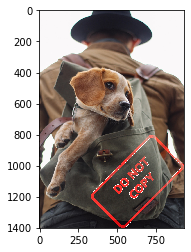

In [43]:
large_img = img1
small_img = final_roi

large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)